# RNN 2nd try:
Input: magnetic strength,.
Output: Angle


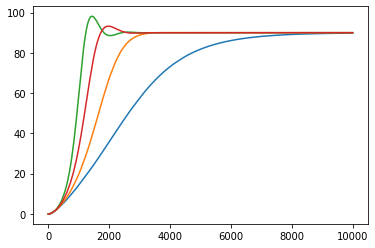

In [4]:
%clear
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn.metrics import mean_squared_error


from Euler_approximation import euler #import euler approximation

[a1,a2,a3,a4]=[20,40,60,80] 
[phi1_a1,phi2_a1]=euler(a1)
[phi1_a2,phi2_a2]=euler(a2)
[phi1_a3,phi2_a3]=euler(a3)
[phi1_a4,phi2_a4]=euler(a4)


plt.plot(phi1_a1)
plt.plot(phi1_a2)
plt.plot(phi1_a4)
plt.plot(phi1_a3)

In [45]:
[a1,a2,a3,a4]=[20,40,60,80] # four sets of magnetic field strength 
 # Get data sequence through Euler approximatiion
[phi1_a1,phi2_a1]=euler(a1)
[phi1_a2,phi2_a2]=euler(a2)
[phi1_a3,phi2_a3]=euler(a3)
[phi1_a4,phi2_a4]=euler(a4)

split_time =8000
T=10000
di=0.001
#Put all angle sequence together
phi1_all=np.concatenate((phi1_a1[:split_time],phi1_a2[:split_time],phi1_a3[:split_time],phi1_a4[:split_time]),axis=0)

 # Calculate the angular velocity
phi2_a1[:split_time]=(phi1_a1[1:split_time+1]-phi1_a1[:split_time])/di
phi2_a2[:split_time]=(phi1_a2[1:split_time+1]-phi1_a2[:split_time])/di
phi2_a3[:split_time]=(phi1_a3[1:split_time+1]-phi1_a3[:split_time])/di
phi2_a4[:split_time]=(phi1_a4[1:split_time+1]-phi1_a4[:split_time])/di
phi2_all=np.concatenate((phi2_a1[:split_time],phi2_a2[:split_time],phi2_a3[:split_time],phi2_a4[:split_time]),axis=0)

 # Calculate the angular acceleration
phi2_diff_all=np.concatenate((phi2_a1[1:split_time+1]-phi2_a1[:split_time],phi2_a2[1:split_time+1]-phi2_a2[:split_time],
                              phi2_a3[1:split_time+1]-phi2_a3[:split_time],phi2_a4[1:split_time+1]-phi2_a4[:split_time]),axis=0)
phi2_diff_all=phi2_diff_all/di

input_a1=a1*np.ones(T)
input_a2=a2*np.ones(T)
input_a3=a3*np.ones(T)
input_a4=a4*np.ones(T)
input=np.concatenate((input_a1[:split_time],input_a2[:split_time],input_a3[:split_time],input_a4[:split_time]),axis=0)

series_input=np.stack((input,phi1_all,phi2_all,phi2_diff_all),axis=1)
series_input=series_input.reshape(4,split_time,4)

x_train=series_input[:,:,0].reshape(4,split_time,1)
y_train=series_input[:,:,1]

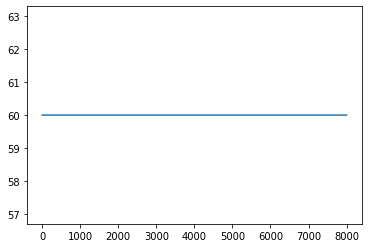

In [46]:
x_train.shape
plt.plot(x_train[2,:])

In [37]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
# window_size = 64
# batch_size = 256

# train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
# input_set = windowed_dataset(input, window_size, batch_size, shuffle_buffer_size)
# print(train_set)
# print(x_train.shape)

#initializer = tf.keras.initializers.Ones()
# model = tf.keras.models.Sequential([tf.keras.layers.SimpleRNN(60, return_sequences=True, input_shape=[None, 3]),
#                                     tf.keras.layers.SimpleRNN(20, return_sequences=True),
#                                     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
# ])

model = tf.keras.models.Sequential([
   tf.keras.layers.SimpleRNN(60,input_shape=(None,1),return_sequences=True),  
   tf.keras.layers.LSTM(30, return_sequences=True),
   tf.keras.layers.Dense(1),
   tf.keras.layers.Lambda(lambda x: x * 400)
])

# input_layer = tf.keras.layers.Input(shape=(None,1),batch_size=1)

# cell = tf.keras.layers.LSTMCell(
#     3,
#     kernel_initializer='glorot_uniform',
#     recurrent_initializer='glorot_uniform',
#     bias_initializer='zeros',
# )

# lstm = tf.keras.layers.RNN(
#     cell,
#     return_state=True,
#     return_sequences=True,
#     stateful=True
#      )

# lstm_out, hidden_state, cell_state = lstm(input_layer)

# #lstm_out, hidden_state, cell_state = tf.keras.layers.LSTM(3,return_state=True, return_sequences=True)(lstm_out)


# # output1 = tf.keras.layers.Dense(30, activation="elu")(lstm_out)
# # output = tf.keras.layers.Dense(3)(output1)

# output = lstm_out
# model = tf.keras.Model(
#     inputs=input_layer,
#     outputs=output
# )
# model = tf.keras.models.Sequential([
#        tf.keras.layers.LSTM(3, batch_input_shape=(1, 1, 3), return_sequences=True, stateful=True),
# #       tf.keras.layers.SimpleRNN(2, input_shape=(1,1),return_sequences=True,use_bias=False), 
# #       tf.keras.layers.TimeDistributed(Dense(32,activation='linear',use_bias=False)),     
#        tf.keras.layers.TimeDistributed(Dense(1))                   
# ])

# model = tf.keras.models.Sequential([
#        tf.keras.layers.SimpleRNN(2, input_shape=(1,1),return_sequences=True,activation='relu',use_bias=False),  
# #       tf.keras.layers.SimpleRNN(2, input_shape=(1,1),return_sequences=True,use_bias=False), 
# #       tf.keras.layers.TimeDistributed(Dense(32,activation='linear',use_bias=False)),     
#        tf.keras.layers.TimeDistributed(Dense(1,activation='relu',use_bias=False,kernel_initializer=initializer))                        
# ])

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
#                       input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
#   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#   tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 100.0)
# ])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 20))

checkpoint_cb = tf. keras.callbacks.ModelCheckpoint("my_keras_model.h5")
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('mae')<1):
        print("\n 99% acc reached")
        self.model.stop_training = True

#optimizer = tf.keras.optimizers.Adam(lr=1e-5)#, momentum=0.9)
optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(x_train, y_train, epochs=500)#,callbacks=[CustomCallbacks()])

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 24.9820 - mae: 25.4820
Epoch 2/500
1/1 [==============================] - 1s 896ms/step - loss: 24.3038 - mae: 24.8038
Epoch 3/500
1/1 [==============================] - 1s 892ms/step - loss: 23.0226 - mae: 23.5226
Epoch 4/500
1/1 [==============================] - 1s 889ms/step - loss: 21.2115 - mae: 21.7115
Epoch 5/500
1/1 [==============================] - 1s 891ms/step - loss: 18.9412 - mae: 19.4412
Epoch 6/500
1/1 [==============================] - 1s 888ms/step - loss: 16.2779 - mae: 16.7779
Epoch 7/500
1/1 [==============================] - 1s 893ms/step - loss: 13.2827 - mae: 13.7827
Epoch 8/500
1/1 [==============================] - 1s 892ms/step - loss: 10.0115 - mae: 10.5115
Epoch 9/500
1/1 [==============================] - 1s 884ms/step - loss: 6.5659 - mae: 7.0632
Epoch 10/500
1/1 [==============================] - 1s 894ms/step - loss: 3.8202 - mae: 4.2627
Epoch 11/500
1/1 [============================

1/1 [==============================] - 1s 1s/step - loss: 0.5969 - mae: 0.9097
Epoch 89/500
1/1 [==============================] - 1s 1s/step - loss: 0.5992 - mae: 0.9157
Epoch 90/500
1/1 [==============================] - 1s 1s/step - loss: 0.6019 - mae: 0.9251
Epoch 91/500
1/1 [==============================] - 1s 1s/step - loss: 0.6008 - mae: 0.9252
Epoch 92/500
1/1 [==============================] - 1s 1s/step - loss: 0.5978 - mae: 0.9159
Epoch 93/500
1/1 [==============================] - 1s 1s/step - loss: 0.5969 - mae: 0.9094
Epoch 94/500
1/1 [==============================] - 1s 1s/step - loss: 0.5987 - mae: 0.9067
Epoch 95/500
1/1 [==============================] - 1s 1s/step - loss: 0.6001 - mae: 0.9060
Epoch 96/500
1/1 [==============================] - 1s 1s/step - loss: 0.5991 - mae: 0.9063
Epoch 97/500
1/1 [==============================] - 1s 1s/step - loss: 0.5972 - mae: 0.9085
Epoch 98/500
1/1 [==============================] - 1s 1s/step - loss: 0.5966 - mae: 0.9136
E

Epoch 176/500
1/1 [==============================] - 1s 1s/step - loss: 0.5859 - mae: 0.8937
Epoch 177/500
1/1 [==============================] - 1s 1s/step - loss: 0.5858 - mae: 0.8935
Epoch 178/500
1/1 [==============================] - 1s 1s/step - loss: 0.5857 - mae: 0.8934
Epoch 179/500
1/1 [==============================] - 1s 1s/step - loss: 0.5856 - mae: 0.8932
Epoch 180/500
1/1 [==============================] - 1s 1s/step - loss: 0.5855 - mae: 0.8930
Epoch 181/500
1/1 [==============================] - 1s 1s/step - loss: 0.5854 - mae: 0.8928
Epoch 182/500
1/1 [==============================] - 1s 1s/step - loss: 0.5854 - mae: 0.8926
Epoch 183/500
1/1 [==============================] - 1s 1s/step - loss: 0.5853 - mae: 0.8925
Epoch 184/500
1/1 [==============================] - 1s 1s/step - loss: 0.5852 - mae: 0.8923
Epoch 185/500
1/1 [==============================] - 1s 1s/step - loss: 0.5851 - mae: 0.8921
Epoch 186/500
1/1 [==============================] - 1s 1s/step - loss

1/1 [==============================] - 1s 1s/step - loss: 0.5796 - mae: 0.8799
Epoch 265/500
1/1 [==============================] - 1s 1s/step - loss: 0.5795 - mae: 0.8798
Epoch 266/500
1/1 [==============================] - 1s 1s/step - loss: 0.5795 - mae: 0.8797
Epoch 267/500
1/1 [==============================] - 1s 1s/step - loss: 0.5794 - mae: 0.8795
Epoch 268/500
1/1 [==============================] - 1s 1s/step - loss: 0.5794 - mae: 0.8794
Epoch 269/500
1/1 [==============================] - 1s 1s/step - loss: 0.5793 - mae: 0.8793
Epoch 270/500
1/1 [==============================] - 1s 1s/step - loss: 0.5792 - mae: 0.8791
Epoch 271/500
1/1 [==============================] - 1s 1s/step - loss: 0.5792 - mae: 0.8790
Epoch 272/500
1/1 [==============================] - 1s 1s/step - loss: 0.5791 - mae: 0.8788
Epoch 273/500
1/1 [==============================] - 1s 1s/step - loss: 0.5791 - mae: 0.8787
Epoch 274/500
1/1 [==============================] - 1s 1s/step - loss: 0.5790 - mae

1/1 [==============================] - 1s 1s/step - loss: 0.5754 - mae: 0.8693
Epoch 353/500
1/1 [==============================] - 1s 1s/step - loss: 0.5754 - mae: 0.8692
Epoch 354/500
1/1 [==============================] - 1s 1s/step - loss: 0.5753 - mae: 0.8691
Epoch 355/500
1/1 [==============================] - 1s 1s/step - loss: 0.5753 - mae: 0.8690
Epoch 356/500
1/1 [==============================] - 1s 1s/step - loss: 0.5753 - mae: 0.8689
Epoch 357/500
1/1 [==============================] - 1s 1s/step - loss: 0.5752 - mae: 0.8688
Epoch 358/500
1/1 [==============================] - 1s 1s/step - loss: 0.5752 - mae: 0.8687
Epoch 359/500
1/1 [==============================] - 1s 1s/step - loss: 0.5752 - mae: 0.8686
Epoch 360/500
1/1 [==============================] - 1s 1s/step - loss: 0.5751 - mae: 0.8685
Epoch 361/500
1/1 [==============================] - 1s 1s/step - loss: 0.5751 - mae: 0.8683
Epoch 362/500
1/1 [==============================] - 1s 1s/step - loss: 0.5750 - mae

1/1 [==============================] - 1s 1s/step - loss: 0.5726 - mae: 0.8609
Epoch 441/500
1/1 [==============================] - 1s 1s/step - loss: 0.5725 - mae: 0.8608
Epoch 442/500
1/1 [==============================] - 1s 1s/step - loss: 0.5725 - mae: 0.8607
Epoch 443/500
1/1 [==============================] - 1s 1s/step - loss: 0.5725 - mae: 0.8606
Epoch 444/500
1/1 [==============================] - 1s 1s/step - loss: 0.5725 - mae: 0.8606
Epoch 445/500
1/1 [==============================] - 1s 1s/step - loss: 0.5724 - mae: 0.8605
Epoch 446/500
1/1 [==============================] - 1s 1s/step - loss: 0.5724 - mae: 0.8604
Epoch 447/500
1/1 [==============================] - 1s 1s/step - loss: 0.5724 - mae: 0.8603
Epoch 448/500
1/1 [==============================] - 1s 1s/step - loss: 0.5724 - mae: 0.8602
Epoch 449/500
1/1 [==============================] - 1s 1s/step - loss: 0.5723 - mae: 0.8601
Epoch 450/500
1/1 [==============================] - 1s 1s/step - loss: 0.5723 - mae

In [25]:
model.save('RNN2.h5') 

In [42]:

model= tf.keras.models.load_model("RNN2.h5")
optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
checkpoint_cb = tf. keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(x_train, y_train, epochs=100,callbacks=[checkpoint_cb])

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.5755 - mae: 0.8742
Epoch 2/100
1/1 [==============================] - 1s 979ms/step - loss: 0.5755 - mae: 0.8741
Epoch 3/100
1/1 [==============================] - 1s 992ms/step - loss: 0.5755 - mae: 0.8740
Epoch 4/100
1/1 [==============================] - 1s 971ms/step - loss: 0.5754 - mae: 0.8738
Epoch 5/100
1/1 [==============================] - 1s 980ms/step - loss: 0.5754 - mae: 0.8736
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.5753 - mae: 0.8734
Epoch 7/100
1/1 [==============================] - 1s 965ms/step - loss: 0.5752 - mae: 0.8731
Epoch 8/100
1/1 [==============================] - 1s 982ms/step - loss: 0.5751 - mae: 0.8728
Epoch 9/100
1/1 [==============================] - 1s 1s/step - loss: 0.5751 - mae: 0.8725
Epoch 10/100
1/1 [==============================] - 1s 995ms/step - loss: 0.5750 - mae: 0.8722
Epoch 11/100
1/1 [==============================] - 1s 948ms/step - 

1/1 [==============================] - 1s 1s/step - loss: 0.5695 - mae: 0.8536
Epoch 90/100
1/1 [==============================] - 1s 1s/step - loss: 0.5695 - mae: 0.8535
Epoch 91/100
1/1 [==============================] - 1s 1s/step - loss: 0.5694 - mae: 0.8534
Epoch 92/100
1/1 [==============================] - 1s 1s/step - loss: 0.5694 - mae: 0.8532
Epoch 93/100
1/1 [==============================] - 1s 1s/step - loss: 0.5693 - mae: 0.8531
Epoch 94/100
1/1 [==============================] - 1s 1s/step - loss: 0.5693 - mae: 0.8530
Epoch 95/100
1/1 [==============================] - 1s 1s/step - loss: 0.5692 - mae: 0.8529
Epoch 96/100
1/1 [==============================] - 1s 1s/step - loss: 0.5692 - mae: 0.8528
Epoch 97/100
1/1 [==============================] - 1s 1s/step - loss: 0.5692 - mae: 0.8527
Epoch 98/100
1/1 [==============================] - 1s 1s/step - loss: 0.5691 - mae: 0.8526
Epoch 99/100
1/1 [==============================] - 1s 1s/step - loss: 0.5691 - mae: 0.8525
E

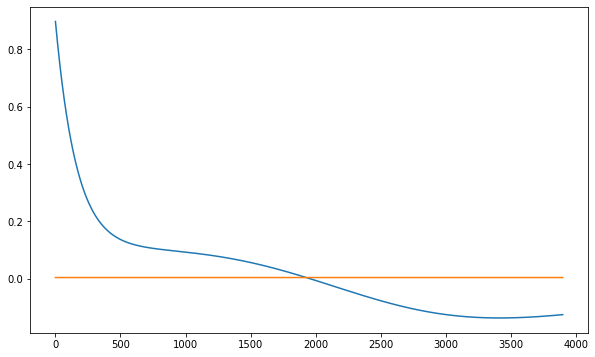

In [43]:
Predict=model.predict(x_train)

# plt.figure(figsize=(10, 6))
# plot_series(range(length), x_difference[:,0])
# plot_series(range(length), np.array(trainPredict[:,0]))

plt.figure(figsize=(10, 6))
plt.plot(y_train[0,100:])
plt.plot(Predict[0,100:])

# plt.figure(figsize=(10, 6))
# plt.plot(y_test[0,:,0])
# plt.plot(Predict[0,:,0])
# plt.figure(figsize=(10, 6))
# plt.plot(y_test[0,:,1])
# plt.plot(Predict[0,:,1])
# plt.figure(figsize=(10, 6))
# plt.plot(y_test[0,:,0])
# plt.plot(Predict[0,:,0])

# plt.figure(figsize=(10, 6))
# plt.plot(y_test[0,:,1])
# plt.plot(Predict[0,:,1])

# plt.figure(figsize=(10, 6))
# plt.plot(y_test[0,:,2])
# plt.plot(Predict[0,:,2])

#rnn_forecast= model_forecast(model, 30, window_size) X-0-80  Y 80-100 sequence to s   s to p  y 81

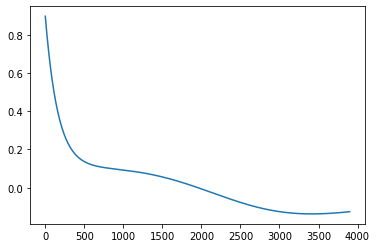

In [30]:
plt.plot(y_train[0,100:])

In [ ]:
y_train.shape

In [ ]:
RNN_MSE_phi1_a1=mean_squared_error(x_train[0,:,0], Predict[0,:,0])
print(a1)
print(RNN_MSE_phi1_a1)


RNN_MSE_phi1_a2=mean_squared_error(x_train[1,:,0], Predict[1,:,0])
print(a2)
print(RNN_MSE_phi1_a2)


RNN_MSE_phi1_a3=mean_squared_error(x_train[2,:,0], Predict[2,:,0])
print(a3)
print(RNN_MSE_phi1_a3)


RNN_MSE_phi1_a4=mean_squared_error(x_train[3,:,0], Predict[3,:,0])
print(a4)
print(RNN_MSE_phi1_a4)




Test one input.  

In [ ]:
# a_test=53
# [phi1_test,phi2_test,sphi1_test,sphi2_test]=function(a_test)
# sphi1_test=sphi1_test/sampling_time

# input_test=a_test*np.ones(split_time)
# input_test=input_test[:split_time:interval]
# input_test=input_test.reshape(1,length,1)
# x_test= sphi1_test[:split_time:interval]

# trainPredict_test=model.predict(input_test)
# trainPredict_test=trainPredict_test.reshape(length)



# Predict_test=(x_test+trainPredict_test)*sampling_time
# #x_difference= x_difference.reshape(length,2)
# # plt.figure(figsize=(10, 6))
# # plot_series(range(length), x_difference[:,0])
# # plot_series(range(length), np.array(trainPredict[:,0]))

# plt.figure(figsize=(10, 6))
# plot_series(range(length), x_test)
# plot_series(range(length), np.array(Predict_test))

**Test** four inputs a=10,30,50,70

In [ ]:
# #test four input a=10, 30, 50, 70. 
# [a1_test,a2_test,a3_test,a4_test]=[10,30,50,70]
# [phi1_a1_test,phi2_a1_test,sphi1_a1_test,sphi2_a1_test]=function(a1_test)
# [phi1_a2_test,phi2_a2_test,sphi1_a2_test,sphi2_a2_test]=function(a2_test)
# [phi1_a3_test,phi2_a3_test,sphi1_a3_test,sphi2_a3_test]=function(a3_test)
# [phi1_a4_test,phi2_a4_test,sphi1_a4_test,sphi2_a4_test]=function(a4_test)

# sphi1_all_test=np.concatenate((sphi1_a1_test,sphi1_a2_test,sphi1_a3_test,sphi1_a4_test),axis=0)
# sphi1_all_test=sphi1_all_test/sampling_time


# input_a1_test=a1_test*np.ones(T)
# input_a2_test=a2_test*np.ones(T)
# input_a3_test=a3_test*np.ones(T)
# input_a4_test=a4_test*np.ones(T)

# input_test=np.concatenate((input_a1_test,input_a2_test,input_a3_test,input_a4_test),axis=0)
# input_test=input_test.reshape(4,T,1)
# input_test=input_test[:,:split_time:interval]

# series_angle_test=sphi1_all_test.reshape(4,T,1)

# x_test =series_angle_test[:,:split_time:interval]

# testPredict = model.predict(input_test)
# testPredict=(x_test+testPredict)*sampling_time
# plt.figure(figsize=(10, 6))
# plt.title('a1_test')
# plot_series(range(length), x_test[0,:,0])
# plot_series(range(length), np.array(testPredict[0,:,0]))

# plt.figure(figsize=(10, 6))
# plt.title('a2_test')
# plot_series(range(length), x_test[1,:,0])
# plot_series(range(length), np.array(testPredict[1,:,0]))

# plt.figure(figsize=(10, 6))
# plt.title('a3_test')
# plot_series(range(length), x_test[2,:,0])
# plot_series(range(length), np.array(testPredict[2,:,0]))

# plt.figure(figsize=(10, 6))
# plt.title('a4_test')
# plot_series(range(length), x_test[3,:,0])
# plot_series(range(length), np.array(testPredict[3,:,0]))


In [ ]:
# DENSE_MSE_phi1_a1_test=mean_squared_error(x_test[0,:,0], testPredict[0,:,0])
# print(a1_test)
# print(DENSE_MSE_phi1_a1_test)


# DENSE_MSE_phi1_a2_test=mean_squared_error(x_test[1,:,0], testPredict[1,:,0])
# print(a2_test)
# print(DENSE_MSE_phi1_a2_test)


# DENSE_MSE_phi1_a3_test=mean_squared_error(x_test[2,:,0], testPredict[2,:,0])
# print(a3_test)
# print(DENSE_MSE_phi1_a3_test)


# DENSE_MSE_phi1_a4_test=mean_squared_error(x_test[3,:,0], testPredict[3,:,0])
# print(a4_test)
# print(DENSE_MSE_phi1_a4_test)


In [ ]:
Q=np.zeros((100,100), dtype=np.int)
num_actions=100
for phi1 in range(90):
    for a in range(num_actions):
      if (phi1>70):
       Q[phi1, a]=100000+1000*a
      else: 
       Q[phi1, a]= np.abs(phi1-45)

In [ ]:
# #def qlearning(episodes):
discount_factor=0.9
alpha=0.9
epsilon=0.9
episodes=100

angle= np.zeros((1,episodes)).squeeze()
magnetic= np.zeros((1,episodes)).squeeze()
state=np.zeros((1,episodes), dtype=int).squeeze()
action_all=np.array([0,0])
for t in range(1,episodes-1):
    
    random_action=np.random.randint(1,100)         
    best_action =1+ np.argmax(Q[state[t]]) 
    action_probabilities=[epsilon/((1.0 - epsilon) / num_actions +epsilon), (1-epsilon)/num_actions/((1.0 - epsilon) / num_actions +epsilon)]
    action_list=[best_action, random_action]
    
    
    # choose action according to the probability distribution 
    action = np.random.choice(action_list, p=action_probabilities)
    action=np.array(action)
    input1=np.float(state[t])
    input2=np.float(state[t-1])
    input3=np.float(action)
    action_all=np.append(action_all, action)
    action_all=action_all.reshape(1,len(action_all),1)
    state_sequence=model.predict(action_all)
    state[t+1]=state_sequence[:,len(state_sequence)-1]
    reward= np.abs(state[t]-45)
    state[t+1]=np.round( state[t+1])
    best_next_action = np.argmax(Q[state[t+1]])  
    Q_target = reward + discount_factor * Q[state[t+1], best_next_action] 
    Q_delta = Q_target - Q[state[t],action]
    Q[state[t],action]+= alpha * Q_delta

    
    angle[t]= np.float(state[t])
    magnetic[t]=action
    

#     #return Q 

In [ ]:


angle=np.array(angle)
plot_series(range(episodes),angle)

np.set_printoptions(threshold=np.inf)
magnetic
#print(state)
#print(magnetic)
#print(Q)
print(state_sequence)

